In [96]:
import math

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sb
import math

Hugo Allan García Monterrosa

Número de Matrícula 520462250


# Problema 1
## A. Polinomio con mejor ajuste.
Para encontrar el polinomio con mejor ajuste vamos a proceder a hacer 50 modelos
polinomiales y usaremos como medida de ajuste el Residual Squared Sum (RSS) dado por

$$ RSS = \sum_{i=1} (y_i - f(x_i))^2$$

El RSS es una buena medida de ajuste, ya que mide que tanto se alejan los datos observados
de las predicciones realizadas por el modelo.

<AxesSubplot:>

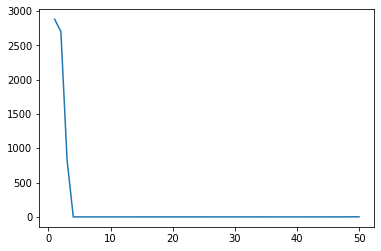

In [97]:
#Lectura del archivo CSV con los datos
datos_p1 = pd.read_csv("../data/problem1.csv")
max_pol_degree = 50
rss = []
X_train, y_train, X_test, y_test = datos_p1["X_training"],\
                   datos_p1["Y_training"],\
                    datos_p1["X_test"],\
                    datos_p1["Y_test"]

X_test.dropna(inplace=True)
y_test.dropna(inplace=True)

for i in range(1,max_pol_degree+1):
    poly = PolynomialFeatures(i, include_bias=True)
    poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
    poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
    polyreg = LinearRegression()
    polyreg.fit(poly_features,y_train)
    rss.append( np.sum(np.square( y_train - polyreg.predict( poly_features ) )))

#Haciendo gráfica de los resultados de RSS
sb.lineplot(x = range(1, max_pol_degree+1), y = rss)

In [98]:
#Imprimiendo el grado del polinomio con mejor ajuste
print("El polinomio con el mejor ajuste es el de grado {}".format(np.argmin(rss) + 1))


El polinomio con el mejor ajuste es el de grado 38


## B. Criterio AIC.
Calcularemos el AIC corregido utilizando las fórmulas
 $$ AIC = 2k -2\log(L) $$
 $$ AICc = AIC + \frac{2k(k+1)}{n-k-1} $$
 donde $k$ es el número de variables independientes en el modelo y $L$ es la medida de verosimulitud
 utilizada en el modelo, en este caso el MSS. Con esto calculamos los AIC y los graficamos, como
 sigue:

In [99]:
AIC = []
n = len(X_train)
for i in range(1, max_pol_degree +1):
    AIC.append( 2*(i+1) - 2*np.log10(rss[i-1] / n ) + (2*(i+1)*(i+2)) / ( n - i -2) )

<AxesSubplot:>

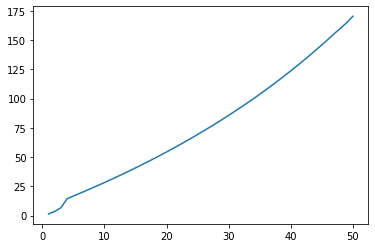

In [100]:
sb.lineplot(x = range(1, max_pol_degree+1), y = AIC)

De la gráfica podemos observar que, siguiendo el criterio de minimización de AIC, deberíamos elegir el polinomio
lineal.


## C. Validación Cruzada
Ahora haremos validación cruzado con los datos de test para encontrar el modelo que hace mejores predicciones. En este caso
el mejor modelo será el que tenga el score más bajo.

In [101]:
valores = []
for i in range(1,max_pol_degree+1):
    poly = PolynomialFeatures(i, include_bias=True)
    poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
    poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
    polyreg = LinearRegression()
    polyreg.fit(poly_features,y_train)
    mse = mean_squared_error(y_test, polyreg.predict(poly_features_test))
    valores.append(mse)
print("El polinomio con menor score en la validación cruzada fue el de grado {}".format(np.argmin(valores) +1))

El polinomio con menor score en la validación cruzada fue el de grado 6


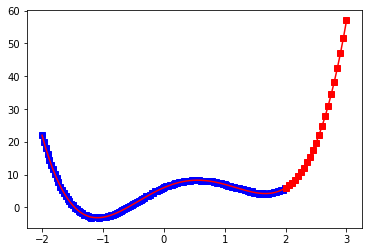

In [102]:
poly = PolynomialFeatures(6, include_bias=True)
poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
polyreg = LinearRegression()
polyreg.fit(poly_features,y_train)
plt.plot(X_train, y_train, 'bs', label = "Datos de entrenamiento")
plt.plot(X_test, y_test, 'rs', label = "Datos de testing")
plt.plot(X_train, polyreg.predict(poly_features), 'r', label = 'Valores predecidos')
plt.plot(X_test, polyreg.predict(poly_features_test), 'r', label = 'Valores predecidos')

En realidad, si hacemos validación cruzada desde la construcción del modelo, con 5 folds, obtenemos que el mejor modelo
sería el de grado 4. Como se ve en las siguientes gráficas, en la primera vemos los scores para cada grado y en la segunda
como se ajusta el polinomio a los valores de testing.

Text(0.5, 1.0, 'MSE VS Grado')

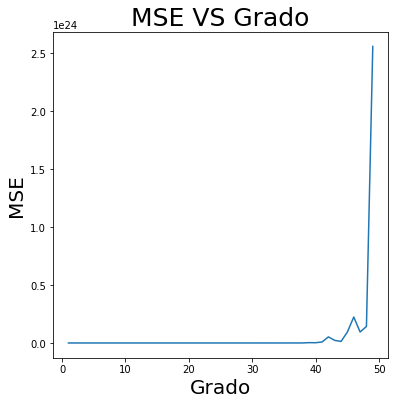

In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
training_error=[]
cross_validation_error=[]
for d in range(1,max_pol_degree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(np.array(X_train).reshape(-1,1))
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(np.array(X_test).reshape(-1,1))
    lr=LinearRegression(fit_intercept=False)
    model = lr.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,max_pol_degree),cross_validation_error)
ax.set_xlabel('Grado',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Grado',fontsize=25)

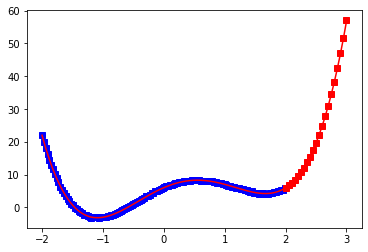

In [104]:
poly = PolynomialFeatures(4, include_bias=True)
poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
polyreg = LinearRegression()
polyreg.fit(poly_features,y_train)
plt.plot(X_train, y_train, 'bs', label = "Datos de entrenamiento")
plt.plot(X_test, y_test, 'rs', label = "Datos de testing")
plt.plot(X_train, polyreg.predict(poly_features), 'r', label = 'Valores predecidos')
plt.plot(X_test, polyreg.predict(poly_features_test), 'r', label = 'Valores predecidos')

# Problema 2
